In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/Users/andy/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train_image, y_train_label), \
(X_test_image, y_test_label) = mnist.load_data()

In [3]:
#將feature原本28 x 28的二維向量轉為784的一維向量,並轉為小數值
X_Train = X_train_image.reshape(60000,784).astype('float32')
X_Test = X_test_image.reshape(10000,784).astype('float32')

In [5]:
#標準化
X_Train_normalize = X_Train/255
X_Test_normalize = X_Test/255

In [4]:
#label原本為0~9的資料，必須經過one-hot encoding轉換為10個連續數字，正好對應到輸出層10個神經元
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

# 1.建立模型

In [6]:
from keras.models import Sequential #線性堆疊模型
from keras.layers import Dense #神經網路層

In [7]:
#建立線性堆疊模型
model = Sequential()

In [8]:
#建立輸入層與隱藏層
model.add(Dense(units=256, #隱藏層256個神經元
               input_dim=784, #輸入層784個神經元
               kernel_initializer='normal', #常態分佈
               activation='relu')) #激活函數為relu

In [9]:
#建立輸出層
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [10]:
#查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#設定模型參數，loss_function，optimizer，評估方式為accuracy
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [14]:
#開始訓練
train_history = model.fit(x=X_Train_normalize,
                         y=y_TrainOneHot,validation_split=0.2, #切成80%training,20%testing
                         epochs=10, batch_size=200,verbose=2) #執行10次訓練週期，每一批次200筆資料，所以每一次執行約為48000/200=240筆資料，verbose顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.4380 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9404
Epoch 2/10
 - 2s - loss: 0.1910 - acc: 0.9454 - val_loss: 0.1558 - val_acc: 0.9554
Epoch 3/10
 - 2s - loss: 0.1355 - acc: 0.9615 - val_loss: 0.1258 - val_acc: 0.9651
Epoch 4/10
 - 2s - loss: 0.1027 - acc: 0.9702 - val_loss: 0.1120 - val_acc: 0.9681
Epoch 5/10
 - 2s - loss: 0.0812 - acc: 0.9772 - val_loss: 0.0982 - val_acc: 0.9718
Epoch 6/10
 - 2s - loss: 0.0660 - acc: 0.9819 - val_loss: 0.0935 - val_acc: 0.9723
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9850 - val_loss: 0.0911 - val_acc: 0.9733
Epoch 8/10
 - 2s - loss: 0.0460 - acc: 0.9875 - val_loss: 0.0829 - val_acc: 0.9760
Epoch 9/10
 - 2s - loss: 0.0380 - acc: 0.9904 - val_loss: 0.0820 - val_acc: 0.9763
Epoch 10/10
 - 2s - loss: 0.0317 - acc: 0.9915 - val_loss: 0.0806 - val_acc: 0.9768


In [15]:
#以圖表顯示訓練過程
import matplotlib.pylab as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(['train','validation'], loc='upper left') #設定圖例
    plt.show()

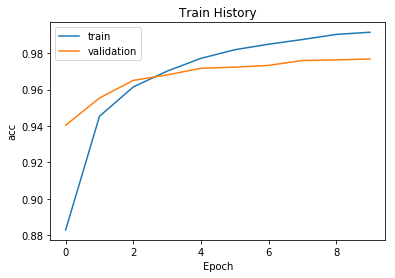

In [18]:
show_train_history(train_history,'acc','val_acc')

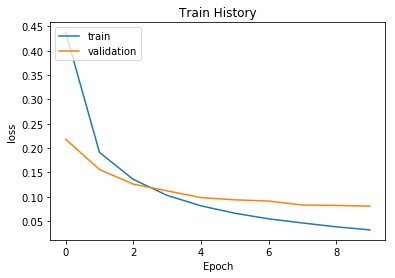

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
#評估模型準確率
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print("accuracy=",scores[1])

10000/10000 [==============================] - 0s 48us/step

accuracy= 0.9761


In [22]:
#進行預測
prediction = model.predict_classes(X_Test)
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [23]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10): #傳入參數數字影像、真實值、預測結果、開始顯示資料、資料筆數
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: 
        num=25
    for i in range(0,num):
        ax = plt.subplot(5,5, 1+i) #建立subgraph子圖形為5行5列
        ax.imshow(images[idx], cmap="binary") #畫出subgraph
        title = "label=" + str(labels[idx]) #設定title,顯示標籤
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) #如果有傳入預測結果，title加入預設結果
        ax.set_title(title,fontsize=10) #設定title與大小
        ax.set_xticks([]) #不顯示刻度
        ax.set_yticks([])
        idx += 1 #讀取下一筆
    plt.show()

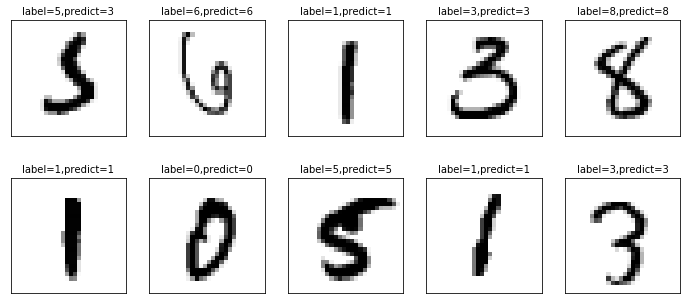

In [24]:
plot_images_labels_prediction(X_test_image,y_test_label,prediction,idx=340)

In [25]:
#建立混淆矩陣，對角線代表預測正確
import pandas as pd
pd.crosstab(y_test_label,prediction,
           rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1009,1,1,0,2,4,9,1
3,0,0,3,992,0,1,0,4,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,853,7,1,8,3
6,5,3,2,1,4,3,937,0,3,0
7,0,5,12,6,1,0,0,990,6,8
8,5,0,3,5,1,1,1,2,955,1


In [26]:
#建立dataframe，真實值與預測值
df = pd.DataFrame({"label":y_test_label, "predict":prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [28]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


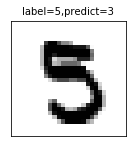

In [34]:
#查看特定筆數資料
plot_images_labels_prediction(X_test_image,y_test_label,
                             prediction,idx=5972,num=1)

# 2.修改模型，將隱藏層增加為1000

In [35]:
model = Sequential()

In [36]:
#建立輸入層與隱藏層
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [37]:
#建立輸出層
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [38]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
#設定模型參數，loss_function，optimizer，評估方式為accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [41]:
#開始訓練
train_history = model.fit(x=X_Train_normalize,
                         y=y_TrainOneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2905 - acc: 0.9164 - val_loss: 0.1531 - val_acc: 0.9567
Epoch 2/10
 - 8s - loss: 0.1150 - acc: 0.9672 - val_loss: 0.1210 - val_acc: 0.9637
Epoch 3/10
 - 5s - loss: 0.0736 - acc: 0.9794 - val_loss: 0.0906 - val_acc: 0.9731
Epoch 4/10
 - 8s - loss: 0.0518 - acc: 0.9853 - val_loss: 0.0815 - val_acc: 0.9744
Epoch 5/10
 - 5s - loss: 0.0360 - acc: 0.9903 - val_loss: 0.0833 - val_acc: 0.9740
Epoch 6/10
 - 5s - loss: 0.0247 - acc: 0.9939 - val_loss: 0.0730 - val_acc: 0.9784
Epoch 7/10
 - 5s - loss: 0.0183 - acc: 0.9955 - val_loss: 0.0733 - val_acc: 0.9778
Epoch 8/10
 - 5s - loss: 0.0136 - acc: 0.9967 - val_loss: 0.0744 - val_acc: 0.9793
Epoch 9/10
 - 5s - loss: 0.0099 - acc: 0.9979 - val_loss: 0.0719 - val_acc: 0.9787
Epoch 10/10
 - 5s - loss: 0.0069 - acc: 0.9991 - val_loss: 0.0803 - val_acc: 0.9764


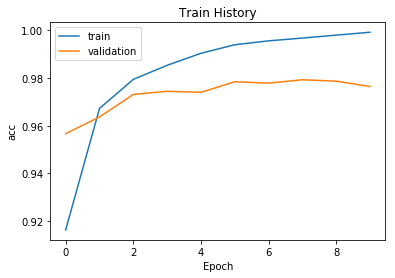

In [42]:
show_train_history(train_history,'acc','val_acc') #overfitting更嚴重

In [43]:
#評估模型準確率
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print("accuracy=",scores[1])

10000/10000 [==============================] - 1s 117us/step

# 3. 再度修改模型，解決overfit問題

In [44]:
from keras.layers import Dropout

In [45]:
model = Sequential()

In [46]:
#建立輸入層與隱藏層
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [47]:
model.add(Dropout(0.5)) #每次訓練時，會隨機放棄其中50%神經元

In [48]:
#建立輸出層
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [49]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
#設定模型參數，loss_function，optimizer，評估方式為accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [51]:
#開始訓練
train_history = model.fit(x=X_Train_normalize,
                         y=y_TrainOneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.3528 - acc: 0.8940 - val_loss: 0.1618 - val_acc: 0.9544
Epoch 2/10
 - 6s - loss: 0.1596 - acc: 0.9534 - val_loss: 0.1177 - val_acc: 0.9654
Epoch 3/10
 - 6s - loss: 0.1150 - acc: 0.9664 - val_loss: 0.0968 - val_acc: 0.9703
Epoch 4/10
 - 7s - loss: 0.0905 - acc: 0.9731 - val_loss: 0.0871 - val_acc: 0.9723
Epoch 5/10
 - 7s - loss: 0.0743 - acc: 0.9775 - val_loss: 0.0799 - val_acc: 0.9761
Epoch 6/10
 - 7s - loss: 0.0638 - acc: 0.9801 - val_loss: 0.0766 - val_acc: 0.9777
Epoch 7/10
 - 6s - loss: 0.0547 - acc: 0.9835 - val_loss: 0.0755 - val_acc: 0.9778
Epoch 8/10
 - 6s - loss: 0.0465 - acc: 0.9854 - val_loss: 0.0698 - val_acc: 0.9802
Epoch 9/10
 - 6s - loss: 0.0422 - acc: 0.9871 - val_loss: 0.0699 - val_acc: 0.9789
Epoch 10/10
 - 6s - loss: 0.0370 - acc: 0.9887 - val_loss: 0.0686 - val_acc: 0.9807


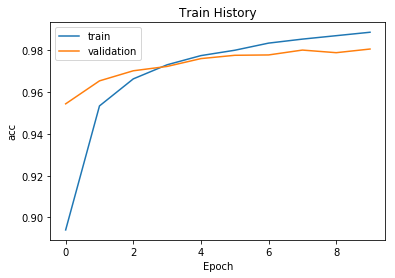

In [52]:
show_train_history(train_history,'acc','val_acc') #train訓練結果與test訓練結果差距縮小，代表解決overfit問題

In [53]:
#評估模型準確率
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print("accuracy=",scores[1])

10000/10000 [==============================] - 1s 111us/step

# 4. 修改模型，加入兩層隱藏層

In [54]:
model = Sequential()

In [55]:
#建立輸入層與隱藏層1
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [56]:
model.add(Dropout(0.5))

In [57]:
#加入隱藏層2
model.add(Dense(units=1000,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

In [58]:
model.add(Dropout(0.5))

In [59]:
#建立輸出層
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [60]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
#設定模型參數，loss_function，optimizer，評估方式為accuracy
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [62]:
#開始訓練
train_history = model.fit(x=X_Train_normalize,
                         y=y_TrainOneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 13s - loss: 0.3753 - acc: 0.8821 - val_loss: 0.1331 - val_acc: 0.9601
Epoch 2/10
 - 12s - loss: 0.1590 - acc: 0.9514 - val_loss: 0.0995 - val_acc: 0.9698
Epoch 3/10
 - 12s - loss: 0.1212 - acc: 0.9623 - val_loss: 0.0910 - val_acc: 0.9719
Epoch 4/10
 - 12s - loss: 0.0975 - acc: 0.9698 - val_loss: 0.0773 - val_acc: 0.9779
Epoch 5/10
 - 12s - loss: 0.0831 - acc: 0.9742 - val_loss: 0.0764 - val_acc: 0.9758
Epoch 6/10
 - 13s - loss: 0.0790 - acc: 0.9746 - val_loss: 0.0732 - val_acc: 0.9786
Epoch 7/10
 - 13s - loss: 0.0679 - acc: 0.9783 - val_loss: 0.0725 - val_acc: 0.9793
Epoch 8/10
 - 13s - loss: 0.0602 - acc: 0.9811 - val_loss: 0.0750 - val_acc: 0.9801
Epoch 9/10
 - 13s - loss: 0.0563 - acc: 0.9820 - val_loss: 0.0729 - val_acc: 0.9800
Epoch 10/10
 - 13s - loss: 0.0525 - acc: 0.9828 - val_loss: 0.0768 - val_acc: 0.9783


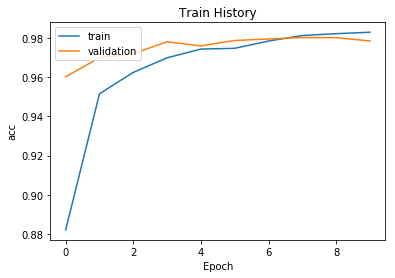

In [63]:
show_train_history(train_history,'acc','val_acc')

In [64]:
#評估模型準確率
scores = model.evaluate(X_Test_normalize, y_TestOneHot)
print()
print("accuracy=",scores[1])

10000/10000 [==============================] - 2s 191us/step